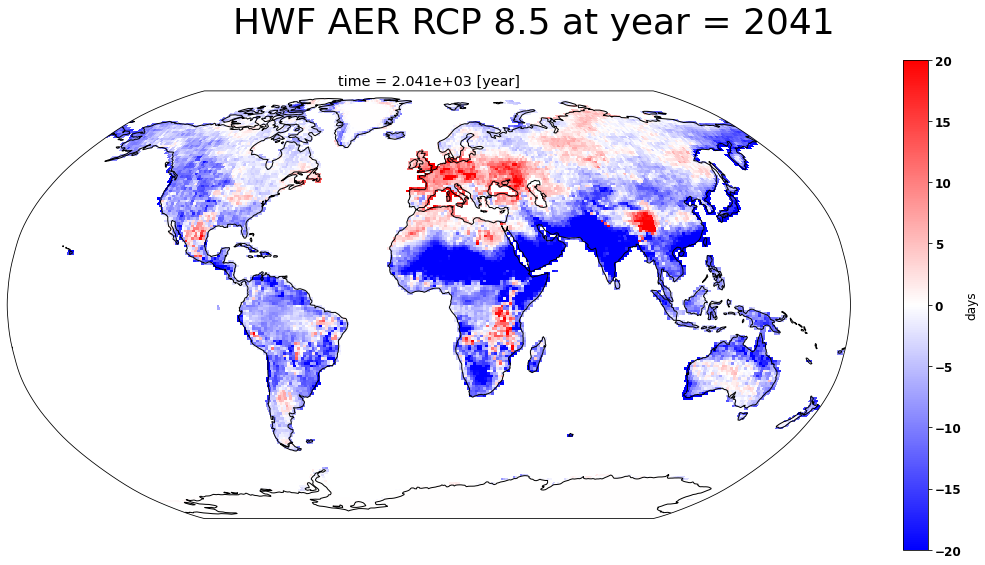

In [11]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import rc
from matplotlib import animation
from IPython.display import HTML
import xarray
from paths import heat_out_trefht_tmin_members_1920_1950_CONTROL as tmin

exp_num = "3136"

land_mask = xarray.open_dataset("../data/land_mask.nc")["__xarray_dataarray_variable__"].load()

all_min, xghg_min, xaer_min = tmin()
all_data = xarray.open_mfdataset([path for path in all_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).mean(dim="member")
aer_data = all_data - xarray.open_mfdataset([path for path in xaer_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).mean(dim="member")

pop_data = xarray.open_dataset("/projects/dgs/persad_research/heat_research/data/population/population_histsoc_30arcmin_annual_1901_2020.nc", decode_times=False)["popc"]

rc('font', **{'weight': 'bold', 'size': 12})
f, ax = plt.subplots(1, 1, figsize=(15, 8), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

f.year = 1921

vmax = 20
vmin = -20
cmap = "bwr"

def init():
    aer_data.sel(time=f.year).plot(ax=ax, vmax=vmax, vmin=vmin, cmap=cmap, transform=ccrs.PlateCarree())
    f.suptitle(f"HWF AER RCP 8.5 at year = {f.year}", fontsize=36)
    ax.coastlines()
    return []

def animate(dt):
    ax.cla()
    if f.year < all_data.time.max():
        f.year = f.year + 1
    aer_data.sel(time=f.year).plot(ax=ax, add_colorbar=False, vmax=vmax, vmin=vmin, cmap=cmap, transform=ccrs.PlateCarree())
    ax.coastlines()
    f.suptitle(f"HWF AER RCP 8.5 at year = {f.year}", fontsize=36)
    f.tight_layout()
    return []

anim = animation.FuncAnimation(f, animate, init_func=init, frames=120, interval=(200), blit=False)
HTML(anim.to_html5_video())

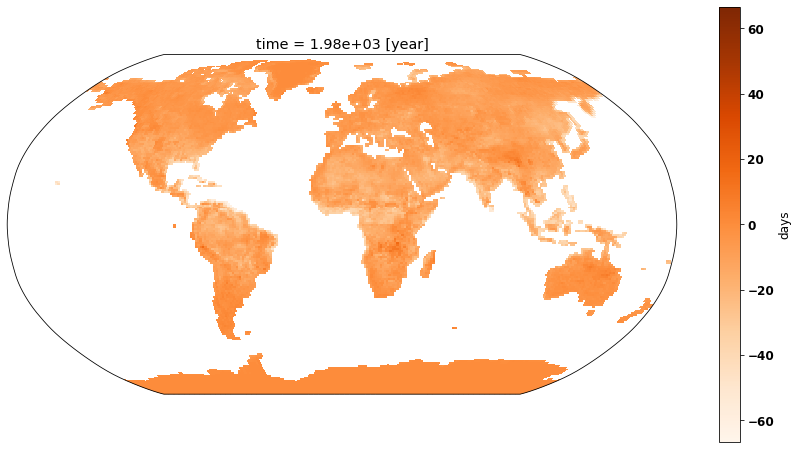

In [9]:
f, ax = plt.subplots(1, 1, figsize=(15, 8), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

aer_data.sel(time=1980).plot(ax=ax, cmap=cmap, transform=ccrs.PlateCarree())